In [18]:
import pandas as pd
# Load the chat data into a Python environment
with open('WhatsApp Chat with Group Study.txt', 'r', encoding='utf-8') as file:
    chat_lines = file.readlines()

# Remove the unnecessary first line
chat_lines = chat_lines[1:]

# Splitting the chat lines into timestamp, sender, and message
chat_data = []
for line in chat_lines:
    parts = line.split(' - ')
    timestamp = parts[0]
    sender_message = ' - '.join(parts[1:])

    # Check if the line contains the delimiter ": "
    if ': ' in sender_message:
        sender, message = sender_message.split(': ', 1)
        chat_data.append({'Timestamp': timestamp, 'Sender': sender, 'Message': message})
    else:
        # If no delimiter found, consider the sender as None and the whole line as message
        chat_data.append({'Timestamp': timestamp, 'Sender': None, 'Message': sender_message})

# Convert to DataFrame
chat_df = pd.DataFrame(chat_data)

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Define preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into text
    processed_text = ' '.join(filtered_tokens)
    return processed_text

# Apply preprocessing function to chat data
chat_df['Processed_Message'] = chat_df['Message'].apply(preprocess_text)

     

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


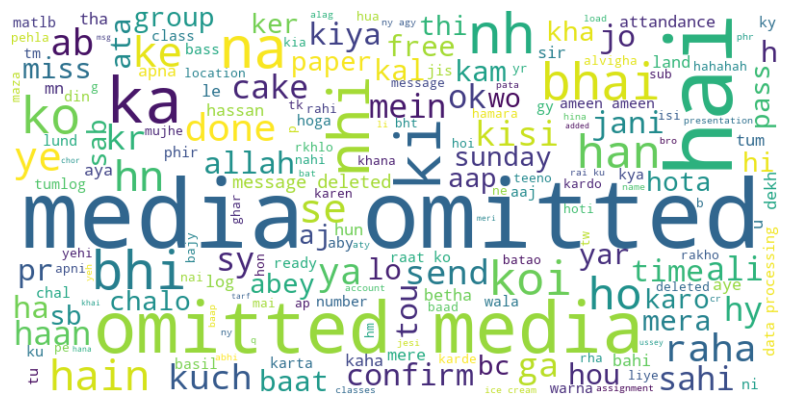

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all messages into a single string
all_messages = ' '.join(chat_df['Processed_Message'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [21]:
# Save word cloud image
wordcloud.to_file('wordcloud.png')


In [22]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
sia = SentimentIntensityAnalyzer()
# Analyze sentiment of messages in chat data

In [24]:
def analyze_sentiment(message):
    # Use VADER SentimentIntensityAnalyzer to get the sentiment score
    sentiment_score = sia.polarity_scores(message)
    # Determine sentiment based on the compound score
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [25]:
chat_df['Sentiment'] = chat_df['Message'].apply(analyze_sentiment)

In [26]:
print(chat_df[['Timestamp', 'Sender', 'Message', 'Sentiment']])

           Timestamp             Sender  \
0     1/21/20, 10:56               None   
1    10/11/22, 23:18               None   
2    10/11/22, 23:19             Rai Ku   
3    10/11/22, 23:20             Ali Ku   
4    10/11/22, 23:20             Ali Ku   
..               ...                ...   
483   12/8/22, 22:06           Mahad Ku   
484   12/8/22, 22:06           Mahad Ku   
485   12/8/22, 22:07           Basil Ku   
486   12/8/22, 22:20  muhammadharisjan5   
487   12/8/22, 22:21           Mahad Ku   

                                               Message Sentiment  
0              Hassan Ku created group "Group Study"\n  Positive  
1                                   Rai Ku added you\n   Neutral  
2    Phir thk han sab msg karen or apna problems ha...  Negative  
3               Sunday ka rakh lo sb free be hon gy.\n  Positive  
4      Matlb Sunday waly din ka Meri tarf Sy done hy\n   Neutral  
..                                                 ...       ...  
483  Betha shu

In [27]:
chat_df.to_csv('whatsapp_chat_with_sentiment.csv', index=False)


In [28]:
chat_df = pd.read_csv('whatsapp_chat_with_sentiment.csv')

In [29]:
print(chat_df['Timestamp'].unique())

['1/21/20, 10:56' '10/11/22, 23:18' '10/11/22, 23:19' '10/11/22, 23:20'
 '10/11/22, 23:21' '10/11/22, 23:22' '10/11/22, 23:23' '10/11/22, 23:24'
 '10/11/22, 23:25' '10/11/22, 23:26' '10/11/22, 23:28' '10/11/22, 23:29'
 '10/11/22, 23:32' '10/11/22, 23:37' '10/11/22, 23:33' '10/11/22, 23:34'
 '10/11/22, 23:36' '10/11/22, 23:38' '10/11/22, 23:39' '10/11/22, 23:45'
 '10/11/22, 23:47' '10/11/22, 23:53' '10/12/22, 00:04' '10/12/22, 00:11'
 '10/12/22, 00:35' '10/12/22, 19:10' '10/13/22, 07:55' '10/12/22, 18:11'
 '10/12/22, 18:14' '10/12/22, 18:15' '(021) 38893933\n'
 'https://maps.app.goo.gl/yRhZC3rd7zjRTR3P8\n' '10/12/22, 18:16'
 '10/12/22, 18:17' '10/12/22, 18:20' '10/12/22, 19:03' '10/12/22, 19:04'
 '10/12/22, 19:05' '10/12/22, 19:08' '10/12/22, 19:09' '10/12/22, 19:11'
 '10/12/22, 19:12' '10/12/22, 19:13' '10/12/22, 19:14' '10/12/22, 19:26'
 '10/12/22, 20:38' '10/12/22, 20:40' '10/12/22, 20:44' '10/12/22, 20:45'
 '10/12/22, 20:46' '10/12/22, 20:47' '10/12/22, 20:48' '10/12/22, 20:50'
 '10

In [30]:
chat_df = chat_df[chat_df['Timestamp'] != '.']  # Remove rows with problematic values

In [31]:
chat_df['Timestamp'] = pd.to_datetime(chat_df['Timestamp'], errors='coerce')  # Convert to datetime, coerce errors to NaT


In [32]:
chat_df = chat_df.dropna(subset=['Timestamp'])

In [33]:
sentiment_trend = chat_df.groupby(chat_df['Timestamp'].dt.date)['Sentiment'].apply(lambda x: (x == 'Positive').mean())


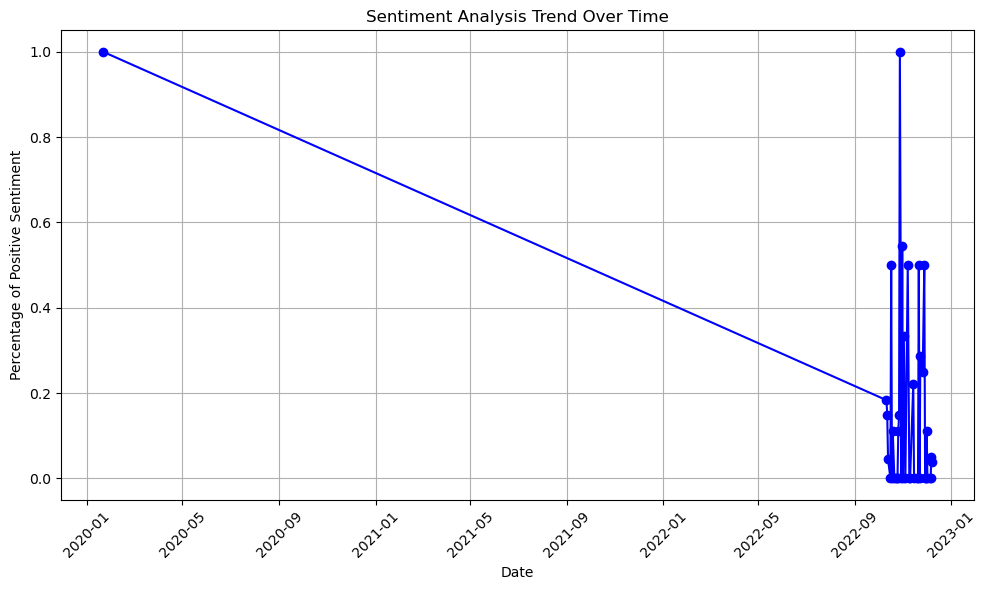

In [34]:
plt.figure(figsize=(10, 6))
sentiment_trend.plot(kind='line', color='blue', marker='o', linestyle='-')
plt.title('Sentiment Analysis Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage of Positive Sentiment')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
     
